In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun
import numpy as np
import os
import sys
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

sys.path.append('../pipeline_scripts/')
from pipeline_main import sink_positions, pipeline, serialize_directory, sinks


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)


In [2]:
data = pipeline(snap = 341, run = f'sink{122}fmr01', loading_bar = True, sink_id = 122)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:50<00:00, 99.25it/s] 


In [3]:
plot_data = serialize_directory(filename = 'infall_panel_data_500.pkl', store = False)

In [4]:
for sink in sinks:
    print(np.log10(plot_data[sink]['top'][0] * data.cgs_density).min(), np.log10(plot_data[sink]['top'][0] * data.cgs_density).max())
    #print(f'sink{sink}  {np.log10(plot_data[sink]['x'][0] * data.cgs_density).min()}    {np.log10(plot_data[sink]['x'][0] * data.cgs_density).max()}')

-2.4345446066046015 3.3675959348780578
-1.8883900495391808 3.808185818364802
-1.9869140834625263 3.889341744001968
-1.5474981829098713 3.8673228132991273
-1.3948163264712883 3.822657751430368
-1.6620961599675723 3.7976829950145907
-2.015568889355951 4.030859951499738
-1.5023261578198492 3.9367112948864507
-2.7740165314512595 3.7309478261897078


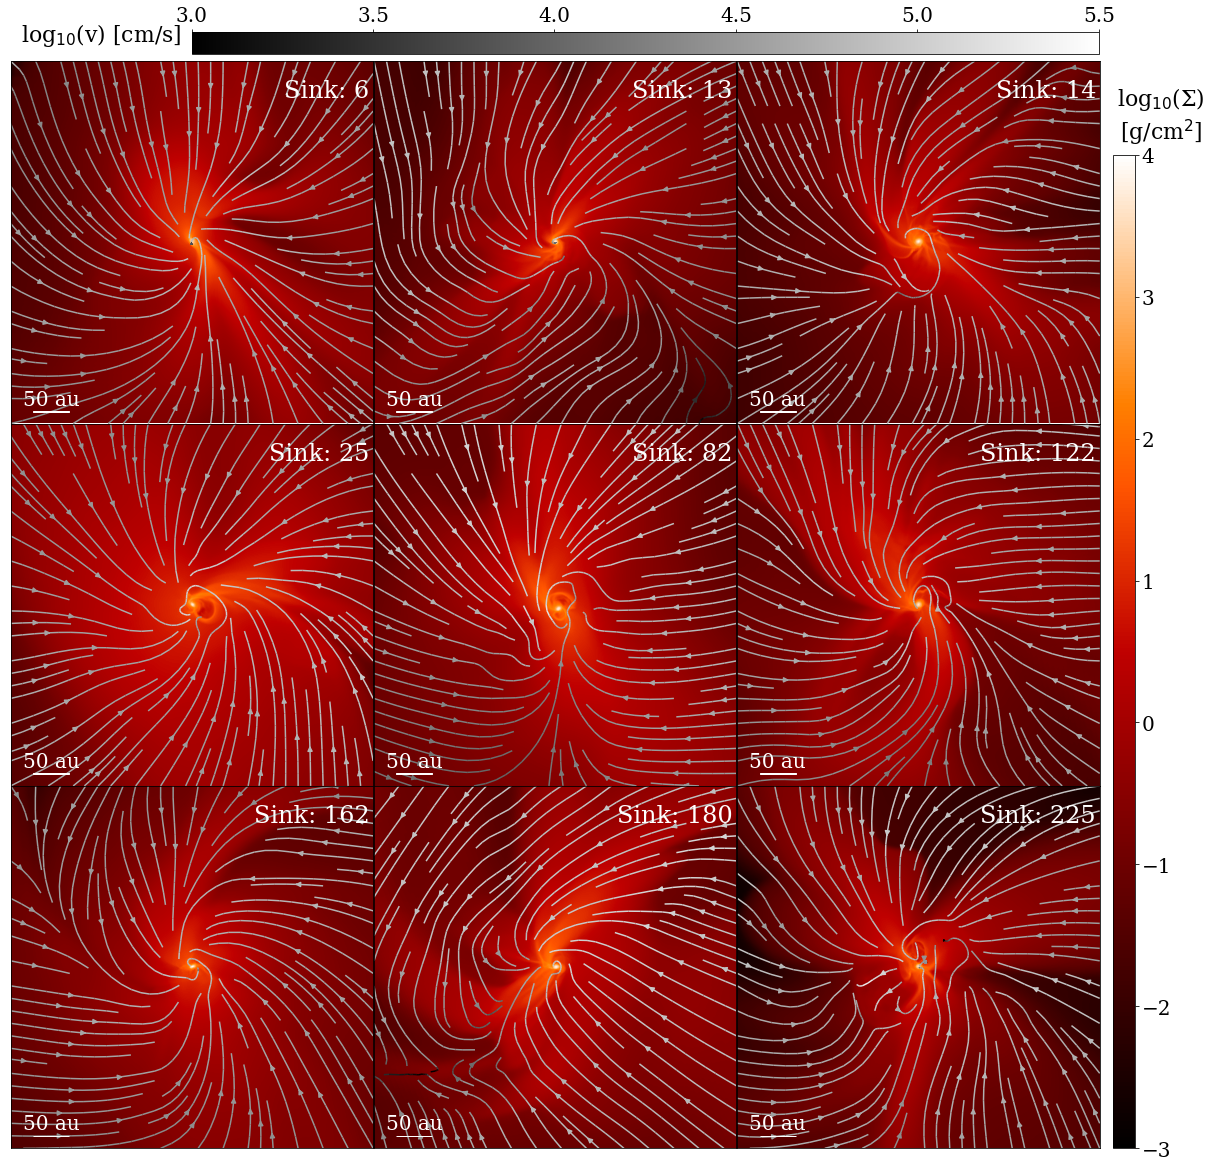

In [5]:
extent = 500 
res = 1000
scale_bar = 50


X, Y = [np.linspace(-extent //2, extent // 2, res) for _ in range(2)]
xx,yy = np.meshgrid(X, Y)


density = 1.0
vmin_strm, vmax_strm = 3, 5.5


norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)

fig, axs = plt.subplots(3,3, figsize = (20,20))

for ax, sink in zip(axs.flatten(), sinks):

    vel_face = np.array([plot_data[sink]['top'][1],  plot_data[sink]['top'][2]])* data.cms_velocity
    velnorm_face = np.sqrt(vel_face[0,...]**2 + vel_face[1,...]**2)    

    
    cs = ax.imshow(np.log10(plot_data[sink]['top'][0] * data.cgs_density),  extent = (-extent//2, extent//2, -extent//2, extent/2), cmap = 'gist_heat', vmin = -3, vmax=4, origin = 'lower')
    strm  = ax.streamplot(X, Y, vel_face[0,...] , vel_face[1,...], color = np.log10(velnorm_face), cmap=mpl.cm.gist_gray, arrowsize=1., norm = norm, density = density)

    ax.set_xticks([]); ax.set_yticks([]); ax.set(ylim = (-extent //2 , extent //2), xlim = (-extent //2 , extent //2))

    scalebar = AnchoredSizeBar(ax.transData, scale_bar, '50 au', 'lower left', 
                        pad=0.5,
                        color='white',
                        frameon=False,
                        fontproperties = fm.FontProperties(size=20),
                        size_vertical=1,
                        label_top=True)

    ax.add_artist(scalebar)
    ax.text(0.99, 0.95, f'Sink: {sink}', transform=ax.transAxes, ha='right', va='top', fontsize = 24, color = 'white')

cbaxes_top = fig.add_axes([0.26, 0.885, 0.63, 0.015])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(strm.lines, cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log$_{10}$(v) [cm/s]', labelpad=-35, x=-0.1, rotation=0, fontsize=22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')


cbaxes_side = fig.add_axes([0.90, 0.125, 0.015, 0.69])
cbar_side = fig.colorbar(cs, cax = cbaxes_side)
cbar_side.set_label('log$_{10}$(Σ)\n[g/cm$^2$]', labelpad = -10, y = 1.07, rotation = 0, fontsize = 22)

fig.subplots_adjust(wspace=-0.067, hspace=0)
#fig.savefig('/groups/astro/kxm508/codes/python_dispatch/graphics/all_cores', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [6]:
np.log10(2e5)

5.301029995663981

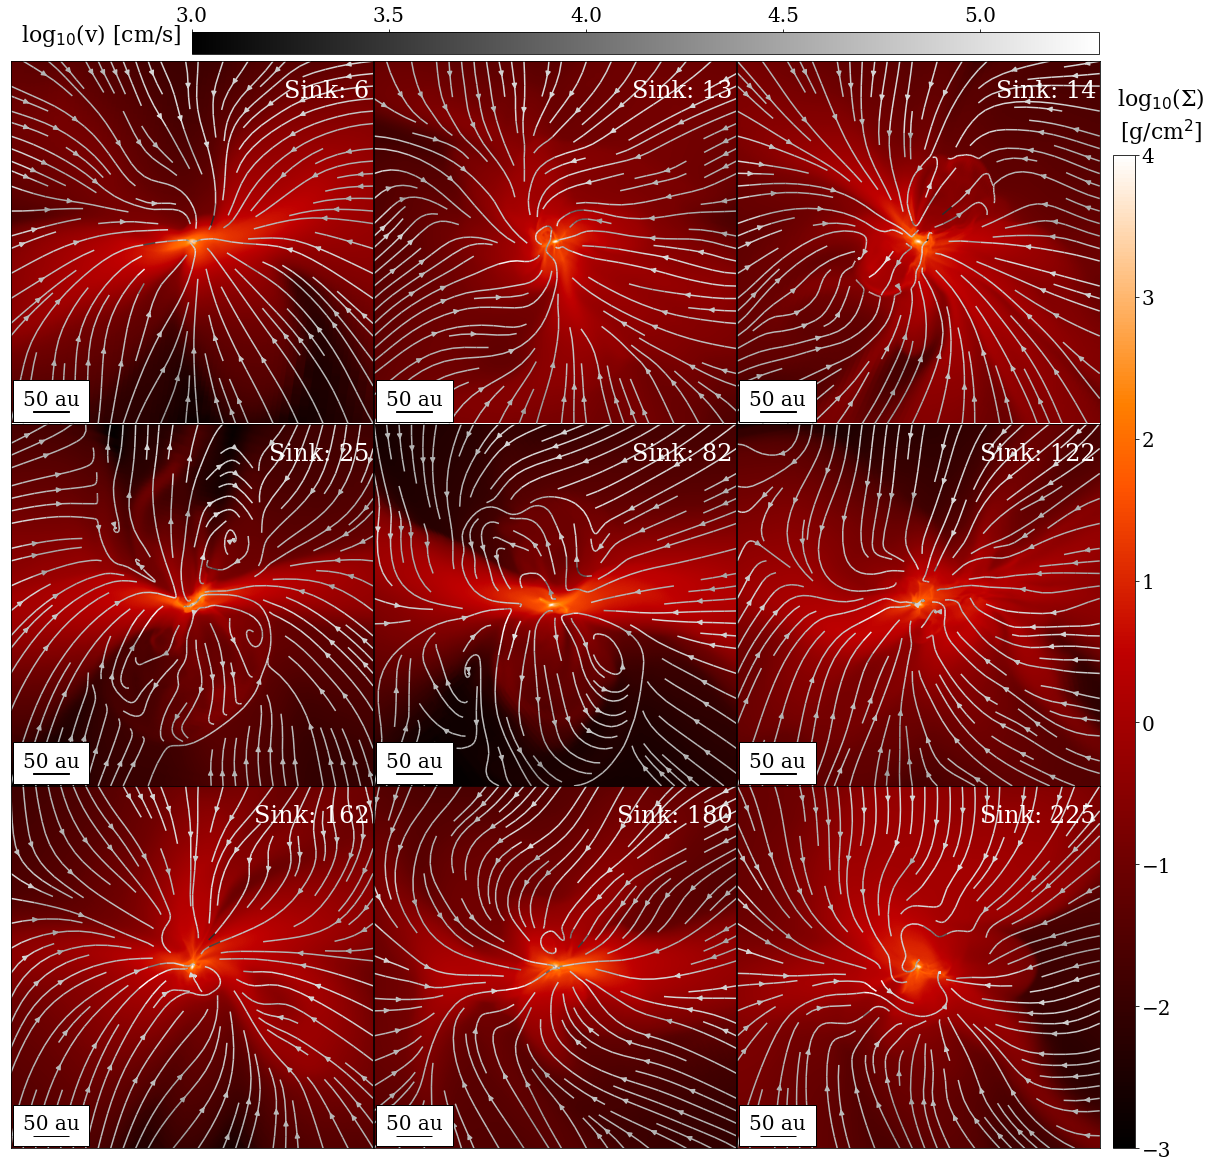

In [9]:
extent = 500 
res = 1000
scale_bar = 50


X, Y = [np.linspace(-extent //2, extent // 2, res) for _ in range(2)]
xx,yy = np.meshgrid(X, Y)


density = 1.0
vmin_strm, vmax_strm = np.log10(1000), np.log10(2e5)

norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)

fig, axs = plt.subplots(3,3, figsize = (20,20))

for ax, sink in zip(axs.flatten(), sinks):

    vel_edge = np.array([plot_data[sink]['edge'][2],  plot_data[sink]['edge'][3]])* data.cms_velocity
    velnorm_edge = np.sqrt(vel_face[0,...]**2 + vel_face[1,...]**2)    

    
    cs = ax.imshow(np.log10(plot_data[sink]['edge'][0] * data.cgs_density),  extent = (-extent//2, extent//2, -extent//2, extent/2), cmap = 'gist_heat', vmin = -3, vmax=4, origin = 'lower')
    strm  = ax.streamplot(X, Y, vel_edge[0,...] , vel_edge[1,...], color = np.log10(velnorm_edge), cmap=mpl.cm.binary_r, arrowsize=1., norm = norm, density = density)

    ax.set_xticks([]); ax.set_yticks([]); ax.set(ylim = (-extent //2 , extent //2), xlim = (-extent //2 , extent //2))

    scalebar = AnchoredSizeBar(ax.transData, scale_bar, '50 au', 'lower left', 
                        pad=0.5,
                        color='black',
                        frameon=True,
                        fontproperties = fm.FontProperties(size=20),
                        size_vertical=1,
                        label_top=True)

    ax.add_artist(scalebar)
    ax.text(0.99, 0.95, f'Sink: {sink}', transform=ax.transAxes, ha='right', va='top', fontsize = 24, color = 'white')
cbaxes_top = fig.add_axes([0.26, 0.885, 0.63, 0.015])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(strm.lines, cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log$_{10}$(v) [cm/s]', labelpad=-35, x=-0.1, rotation=0, fontsize=22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')


cbaxes_side = fig.add_axes([0.90, 0.125, 0.015, 0.69])
cbar_side = fig.colorbar(cs, cax = cbaxes_side)
cbar_side.set_label('log$_{10}$(Σ)\n[g/cm$^2$]', labelpad = -10, y = 1.07, rotation = 0, fontsize = 22)

fig.subplots_adjust(wspace=-0.067, hspace=0)
fig.savefig('/groups/astro/kxm508/codes/python_dispatch/graphics/all_infall_edge', facecolor = 'w', bbox_inches='tight', dpi = 500)